In [1]:
from pathlib import Path

In [2]:
path=Path('titanic')

In [3]:
import pandas as pd

In [22]:
import numpy as np

In [77]:
import torch

In [62]:
from torch import tensor

In [90]:
from fastai.vision.all import *

In [4]:
df=pd.read_csv(path/'train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
mode=df.mode().iloc[0]

In [14]:
mode

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [15]:
df.fillna(mode,inplace=True)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot: >

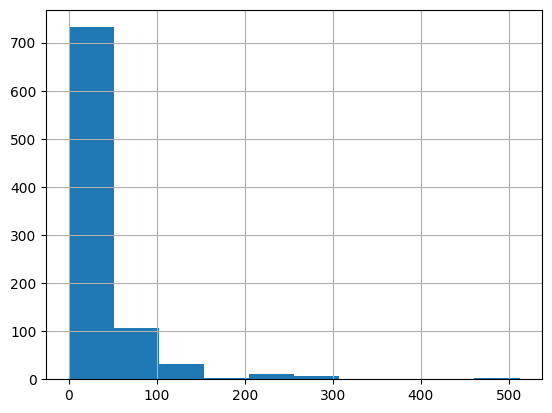

In [21]:
df.Fare.hist()

In [23]:
df['Fare']=np.log(df['Fare']+1)

In [25]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,2.962246
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,0.969048
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,2.187218
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,2.737881
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,3.465736
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,6.240917


In [28]:
df['Age']=np.log(df['Age']+1)

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,3.135494,1,0,A/5 21171,2.110213,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.663562,1,0,PC 17599,4.280593,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,3.295837,0,0,STON/O2. 3101282,2.188856,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.583519,1,0,113803,3.990834,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,3.583519,0,0,373450,2.202765,B96 B98,S


In [84]:
df=pd.get_dummies(df,columns=['Sex','Embarked','Pclass'])

In [91]:
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",3.135494,1,0,A/5 21171,2.110213,B96 B98,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",3.663562,1,0,PC 17599,4.280593,C85,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",3.295837,0,0,STON/O2. 3101282,2.188856,B96 B98,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3.583519,1,0,113803,3.990834,C123,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",3.583519,0,0,373450,2.202765,B96 B98,0,1,0,0,1,0,0,1


In [85]:
t_val=tensor(df['Survived'])

In [103]:
columns=['Age','Parch','Fare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Pclass_1','Pclass_2','Pclass_3']
t_indep=tensor(df[columns].values, dtype=torch.float)

In [165]:
values,indicies=t_indep.max(dim=0)

In [166]:
t_indep=t_indep/values

In [167]:
train_indep,test_indep=RandomSplitter(seed=442)(t_indep)

In [168]:
train_indep,test_indep=tensor(train_indep),tensor(test_indep)

In [169]:
train_dep,test_dep=RandomSplitter(seed=442)(t_val)

In [170]:
train_dep,test_dep=tensor(train_dep),tensor(test_dep)


In [171]:
def set_params(n):
    param=(torch.rand(n,dtype=torch.float)-0.5)
    param.requires_grad_()
    return param
    

In [172]:
def calc_loss(preds,train_dep=train_dep):
    return abs(preds-train_dep).mean()

In [173]:
def one_epoch(count=1,lr=0.1):
    params=set_params(11)
    epochth_pred=[]
    for i in range(count):
    #update
        epochth_pred.append(f'pred_{i}')
        vars()[f'pred_{i}']=(t_indep[train_indep]*params).sum(dim=1)
        loss=calc_loss(vars()[f'pred_{i}'])
        loss.backward()
        with torch.no_grad():
            print(loss)
            params.sub_(params.grad*lr)
        
    
    

tensor(444.1201, grad_fn=<MeanBackward0>)
tensor(443.8914, grad_fn=<MeanBackward0>)
tensor(443.4344, grad_fn=<MeanBackward0>)
tensor(442.7509, grad_fn=<MeanBackward0>)
tensor(441.8414, grad_fn=<MeanBackward0>)
tensor(440.7089, grad_fn=<MeanBackward0>)
tensor(439.3562, grad_fn=<MeanBackward0>)
tensor(437.7856, grad_fn=<MeanBackward0>)
tensor(436.0011, grad_fn=<MeanBackward0>)
tensor(434.0003, grad_fn=<MeanBackward0>)
